# 📊 Retail Sales Analysis — Summary Report

This report summarizes the main findings from the analysis of the retail sales dataset.
The focus is on identifying:

The best- and worst-selling products

The top- and bottom-performing stores

A cross-analysis between top products and stores to understand how each contributes to total revenue

Actionable insights to improve commercial performance

The data was processed in previous stages: data cleaning, EDA, and the creation of condensed metrics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

prod_rank = pd.read_csv("../data/product_rank.csv")
store_rank = pd.read_csv("../data/store_rank.csv")
cross_table = pd.read_csv("../data/cross_table.csv")
transactions = pd.read_csv("../data/Transactions.csv", parse_dates=["Date"])

## 🥇 Products Analysis

Here you are going to see the ranking of products by total revenue and Pareto's graphic to identify those products that contributes to the business.

C:\Users\crist\AppData\Local\Temp\ipykernel_7912\2630997374.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(prod_rank_sorted["ProductName"], rotation=90)


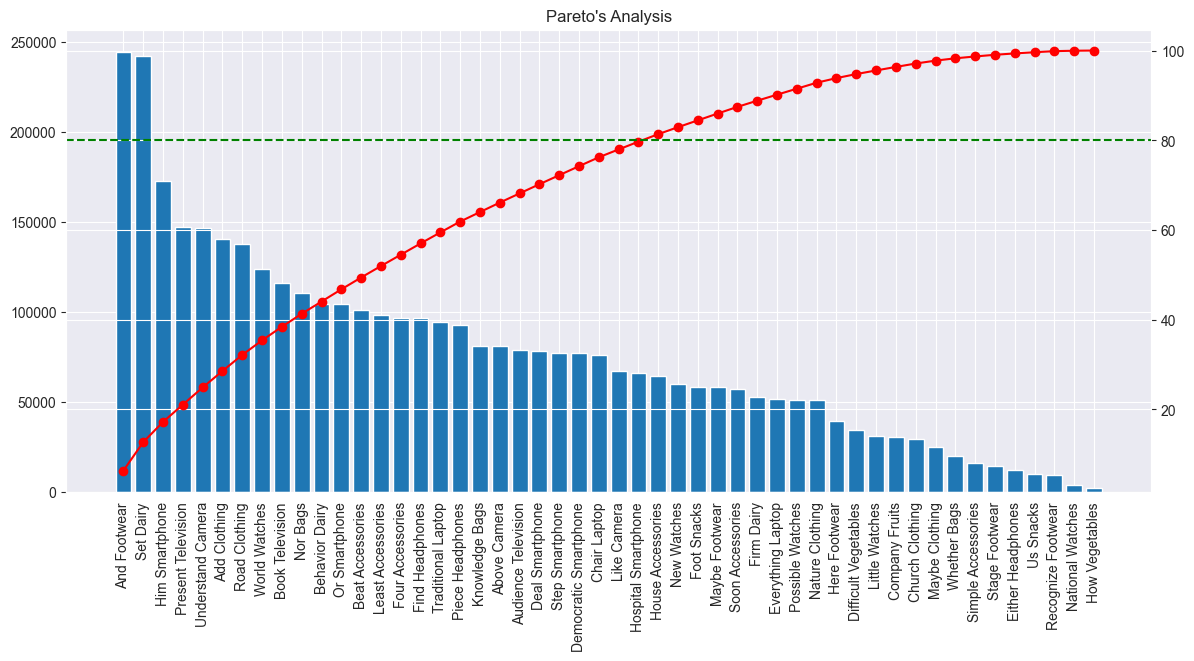

In [2]:
prod_rank_sorted = prod_rank.sort_values("revenue", ascending=False).reset_index(drop=True)
prod_rank_sorted["pct"] = prod_rank_sorted["revenue"] / prod_rank_sorted["revenue"].sum() * 100
prod_rank_sorted["cum_pct"] = prod_rank_sorted["pct"].cumsum()

fig, ax1 = plt.subplots(figsize=(14,6))
ax1.bar(prod_rank_sorted["ProductName"], prod_rank_sorted["revenue"])
ax1.set_xticklabels(prod_rank_sorted["ProductName"], rotation=90)
ax2 = ax1.twinx()
ax2.plot(prod_rank_sorted["cum_pct"], color="red", marker="o")
ax2.axhline(80, linestyle="--", color="green")
plt.title("Pareto's Analysis")
plt.show()

Pareto analysis shows that 80% of the total revenue comes from small group of products.
According to the 80% cumulative line, roughly the top ~12–15 products are responsible for 80% of total revenue.
* The first 2 products generate significantly more revenue than the rest, and represents 15-20% of total revenue.
* After the top 20 items, the revenue drops sharply.

In [3]:
prod_rank_reset = prod_rank.reset_index()
prod_rank_reset['revenue_pct'] = (prod_rank_reset['revenue'] / prod_rank_reset['revenue'].sum()) * 100
prod_rank_reset['cumulative_pct'] = prod_rank_reset['revenue_pct'].cumsum()

In [4]:
def classify_abc(cum_pct):
    if cum_pct <= 80:
        return "A"
    elif cum_pct <= 95:
        return "B"
    else:
        return "C"

prod_rank_reset["ABC"] = prod_rank_reset["cumulative_pct"].apply(classify_abc)

In [5]:
prod_rank_reset[["ProductID", "ProductName", "revenue", "revenue_pct", "cumulative_pct", "ABC"]]

,ProductID,ProductName,revenue,revenue_pct,cumulative_pct,ABC
0,P029,Road Clothing,137641.6375,3.597238,3.597238,A
1,P022,How Vegetables,1699.3900,0.044413,3.641651,A
2,P002,Audience Television,78441.2980,2.050048,5.691699,A
3,P034,Everything Laptop,51214.6375,1.338485,7.030184,A
4,P037,Book Television,115950.6125,3.030347,10.060531,A
5,P023,And Footwear,244603.2625,6.392659,16.453190,A
6,P013,World Watches,123927.3000,3.238816,19.692007,A
7,P048,Nor Bags,110522.0080,2.888471,22.580478,A
8,P045,Set Dairy,242272.2780,6.331740,28.912218,A
9,P021,Firm Dairy,52774.8240,1.379260,30.291478,A


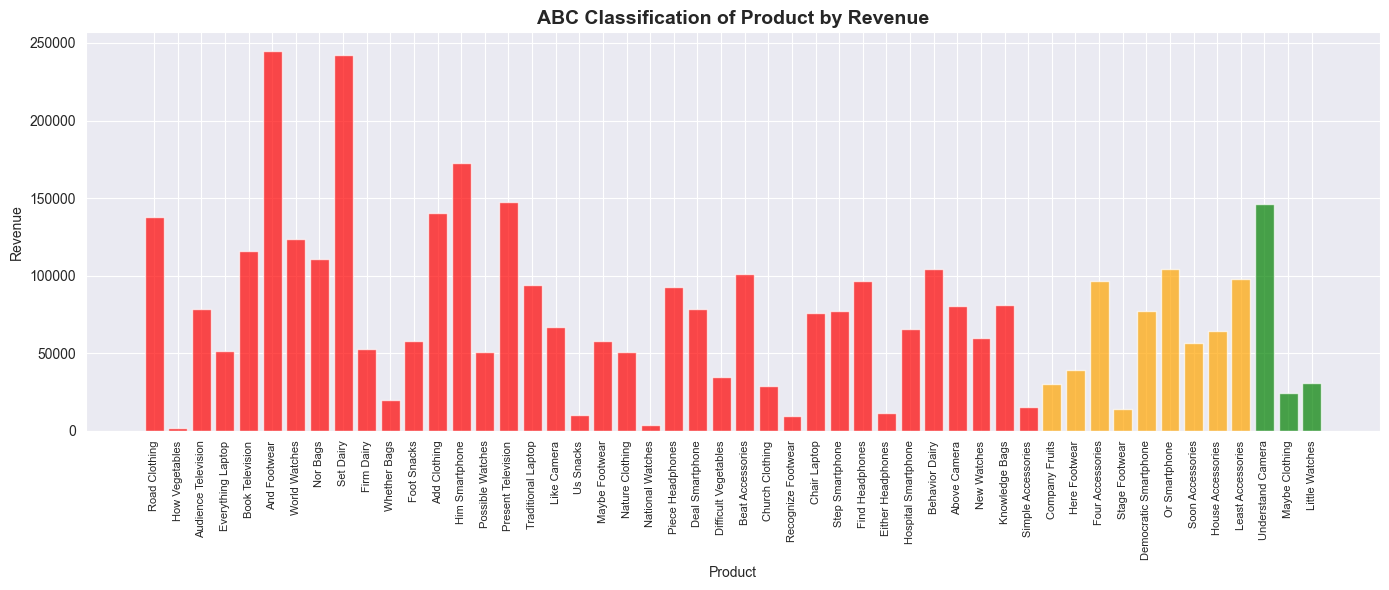

In [6]:
plt.figure(figsize=(14, 6))

colors = {"A": "red", "B": "orange", "C": "green"}

plt.bar(
    prod_rank_reset["ProductName"],
    prod_rank_reset["revenue"],
    color=prod_rank_reset["ABC"].map(colors),
    alpha=0.7
)

plt.xticks(rotation=90, fontsize=8)
plt.title("ABC Classification of Product by Revenue", fontsize=14, fontweight="bold")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

After Pareto's Analysis we develop a group process where we can see products grouping by A, B or C where represents the 80%, 15% or 5% of the revenue.

## 🏬 Store Analysis

Here you can see stores with the highest and lowest revenue.

C:\Users\crist\AppData\Local\Temp\ipykernel_7912\2451440091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_rank_sorted, x="StoreID", y="revenue", palette="viridis")


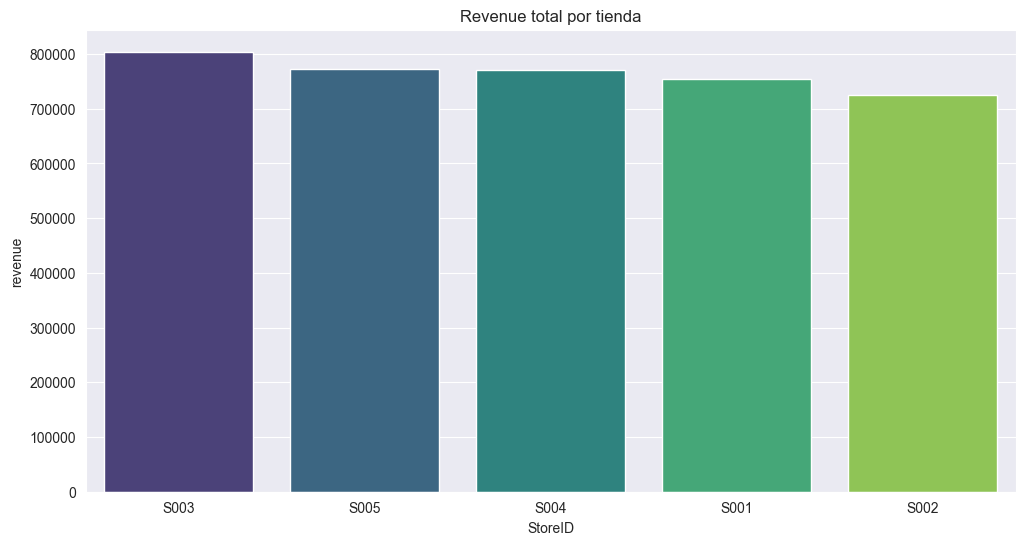

In [7]:
store_rank_sorted = store_rank.sort_values("revenue", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=store_rank_sorted, x="StoreID", y="revenue", palette="viridis")
plt.title("Revenue total por tienda")
plt.show()

## 🔍 Cross Analysis: Stores vs Top Products

In [8]:
cross = pd.read_csv("../data/cross_table.csv")
cross.set_index("StoreID", inplace=True)
cross

,P002,P013,P021,P022,P023,P029,P034,P037,P045,P048
StoreID,,,,,,,,,,
S001,12487.458,20437.48,12591.900,465.3425,39642.7230,23339.2625,11529.6525,25505.1775,53700.080,29020.984
S002,11960.066,20574.08,14125.950,350.6670,56235.5290,24217.6050,11412.2325,20799.6050,35934.970,16034.272
S003,18214.660,30365.44,7088.836,280.3565,62095.2830,27118.6225,8082.5575,18828.6275,52406.506,15251.970
S004,17204.932,21788.74,10467.976,280.9940,35685.0495,36520.9675,9624.2425,22364.7225,44976.662,30155.696
S005,18574.182,30761.56,8500.162,322.0300,50944.6780,26445.1800,10565.9525,28452.4800,55254.060,20059.086


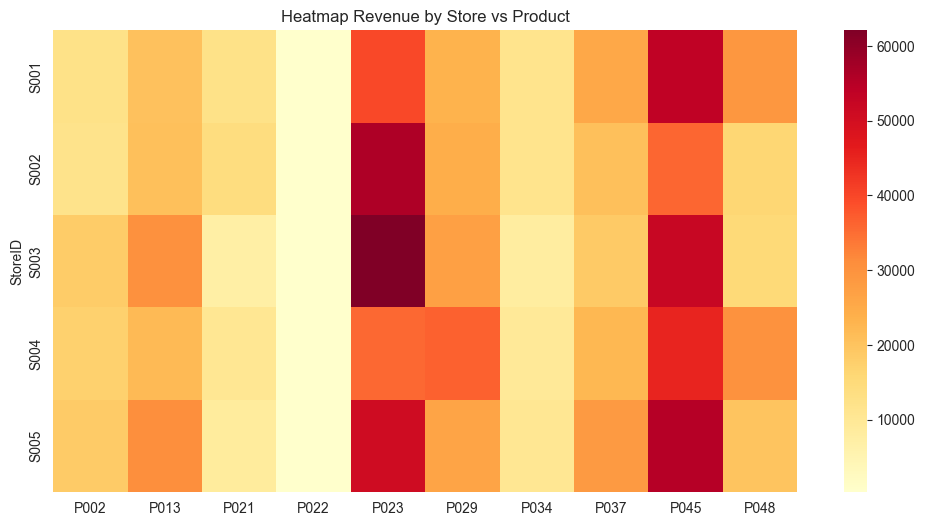

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(cross, annot=False, cmap="YlOrRd")
plt.title("Heatmap Revenue by Store vs Product")
plt.show()

In [10]:
df_Store = pd.read_csv("../data/Stores.csv")
print(df_Store.query('StoreID in ("S001","S002","S003","S005")'))

  StoreID                StoreName            City Region
0    S001  MegaMart Jimenezborough  Jimenezborough  South
1    S002       MegaMart Peckmouth       Peckmouth   East
2    S003     MegaMart New Michele     New Michele   West
4    S005       MegaMart Johnmouth       Johnmouth   East


In [11]:
df_Product = pd.read_csv("../data/Products.csv")
print(df_Product.query('ProductID in ("P023","P045")'))

   ProductID   ProductName   Category SubCategory  UnitPrice  CostPrice
22      P023  And Footwear    Fashion    Footwear    1878.47    1014.91
44      P045     Set Dairy  Groceries       Dairy    1879.08    1004.56


As we saw in Pareto Analysis the product generates more revenue than others, and with the heatmap we can see which stores are responsible for the most revenue and which products are sold in which stores.
* MegaMart Peckmouth and Megamart New Michele are stores who sold the product with the highest revenue.
* Megamart Jimenezborough and Megamart Johnmouth are the stores who sold the product "Set Diary" the second producto with highest revenue.